# Exercise 4.9- Task 2
### 01. Import the libraries data sets into Jupyter
### 02.  create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart
### 03. Check the fundamental data quality and consistency, as missing values and duplicate
### 04. Combine the customer data with the Instracart data
### 05. Export

# 01. Import the libraries data sets into Jupyter

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Turn the project folder path into a string
path = r'/Users/fatemehshahvirdi/Work-Related/Data Analysis/Data Immersion/Achievement 4/Instacart Basket Analysis'

In [5]:
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

# 0.2 Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

## Histogram: Create a histogram of the “order_hour_of_day” column.

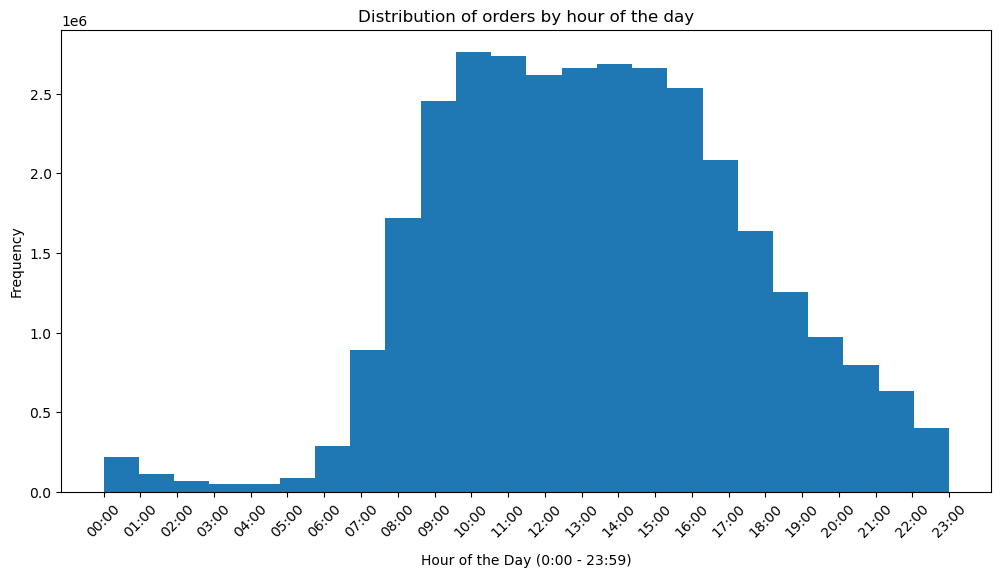

In [36]:
plt.figure(figsize = (12,6))
hist = instacart['order_hour_of_day'].plot.hist(bins = 24)
hist.set_title('Distribution of orders by hour of the day')
hist.set_xlabel("Hour of the Day (0:00 - 23:59)", labelpad=10)
hours = np.arange(0, 24)
hist.set_xticks(hours)
hist.set_xticklabels([f'{hour:02}:00' for hour in hours])
plt.xticks(rotation=45)
plt.show()

#### 
The histogram reveals spikes at particular hours, implying peak times for order placement. Should these peaks cluster around midday or early evening, it could signal a preference among customers for shopping during lunch breaks or post-work hours. Examining the distribution's shape could provide insights into whether orders are concentrated within certain periods or spread evenly throughout the day. A bell-shaped curve might indicate a consistent shopping trend centered around a specific time, whereas a skewed distribution might suggest a propensity for shopping during particular hours, such as afternoons or evenings.

### Bar chart:  Create a bar chart from the “loyalty_flag” column

In [7]:
instacart.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency', 'first_name', 'family_name', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'marital_statues', 'income',
       '_merge'],
      dtype='object')

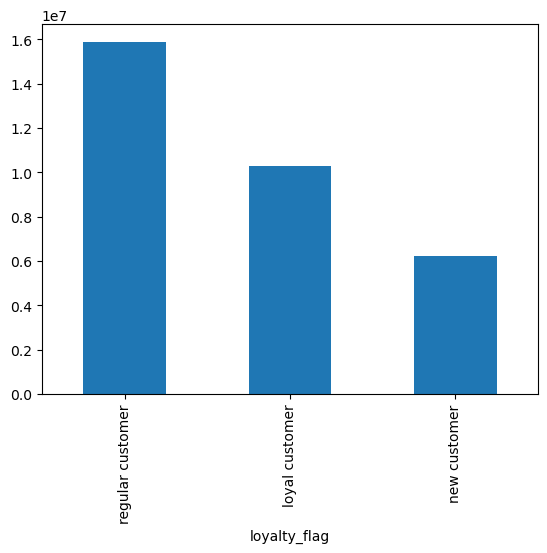

In [8]:
# Sorting by index number
bar = instacart['loyalty_flag'].value_counts().plot.bar()

## Creating a randomized subset

In [9]:
np.random.seed(4)

In [10]:
dev = np.random.rand(len(instacart)) <= 0.7

In [11]:
# Store 70% of the sample in the dataframe big
big = instacart[dev]

In [12]:
# Store 30% of the sample in the dataframe small
small = instacart[~dev]

In [13]:
# checking
len(instacart)

32404859

In [14]:
len(big) + len(small)

32404859

## Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [15]:
# Reduce the sample to the needed columns
instacart_sample = small [['order_hour_of_day', 'prices']]

In [16]:
instacart_sample.head()

,order_hour_of_day,prices
0,11,5.8
2,13,20.0
3,14,20.0
6,13,4.4
10,9,12.8


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


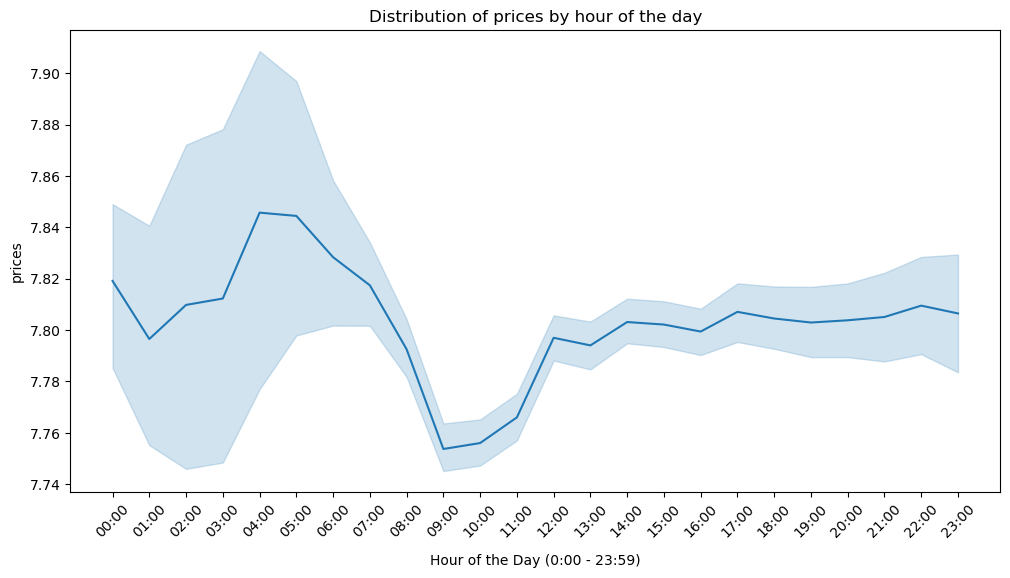

In [38]:
# Create a line chart
plt.figure(figsize = (12,6))
line = sns.lineplot(data = instacart_sample, x = 'order_hour_of_day',y = 'prices')
line.set_title('Distribution of prices by hour of the day')
line.set_xlabel("Hour of the Day (0:00 - 23:59)", labelpad=10)
hours = np.arange(0, 24)
line.set_xticks(hours)
line.set_xticklabels([f'{hour:02}:00' for hour in hours])
plt.xticks(rotation=45)
plt.show()

In [39]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'Distribution of prices by hour of the day.png'))

## You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.


In [18]:
# Reduce previously made sample to only the columns needed
instacart_sample_2 = small [['age','n_dependants']]

In [19]:
instacart_sample_2.head()

,age,n_dependants
0,81,1
2,81,1
3,81,1
6,81,1
10,81,1


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ConversionError: Failed to convert value(s) to axis units: 'age'

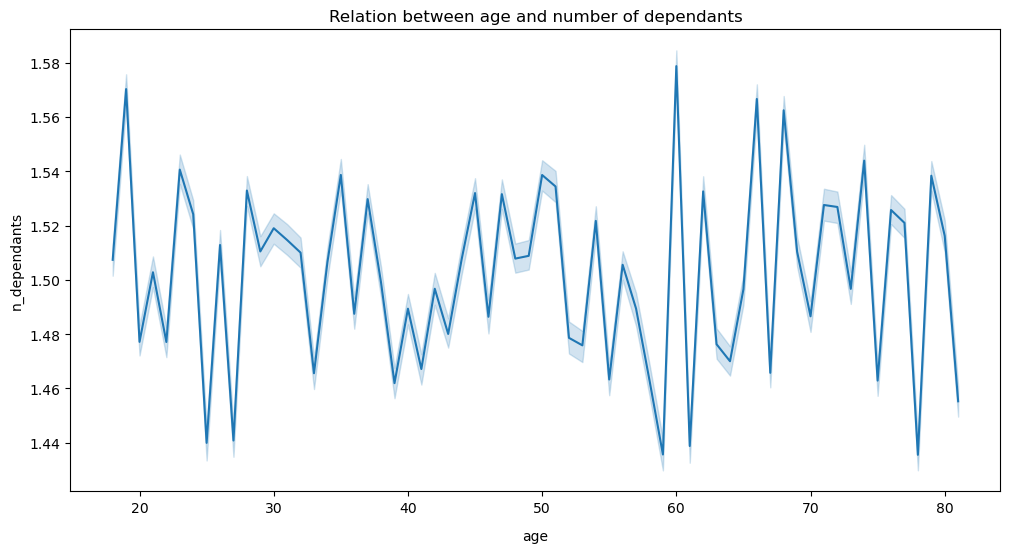

In [40]:
# Create a line chart
plt.figure(figsize = (12,6))
line_2 = sns.lineplot(data = instacart_sample_2, x = 'age',y = 'n_dependants')

line_2.set_title('Relation between age and number of dependants')
line_2.set_xlabel('age', labelpad=10)

line_2.set_xticks('age')
line_2.set_xticklabels('n_dependants')
plt.xticks(rotation=45)
plt.show()

In [41]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'Relation between age and number of dependants.png'))

In [44]:
instacart.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_since_prior_order',
       'order_frequency', 'first_name', 'family_name', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'marital_statues', 'income',
       '_merge'],
      dtype='object')

#### There are no clear patterns that would indicate a strong relationship between age and the number of dependents; for example, the line does not consistently go up or down as age increases.

# 0.3. Explore whether there’s a connection between age and spending power (income) using a scatterplot

In [21]:
# Reduce previously made sample to only the columns needed
instacart_4 = small [['age','income']]

In [22]:
instacart_4.head()

,age,income
0,81,49620
2,81,49620
3,81,49620
6,81,49620
10,81,49620


Text(0.5, 1.0, 'Relation between age and spending power')

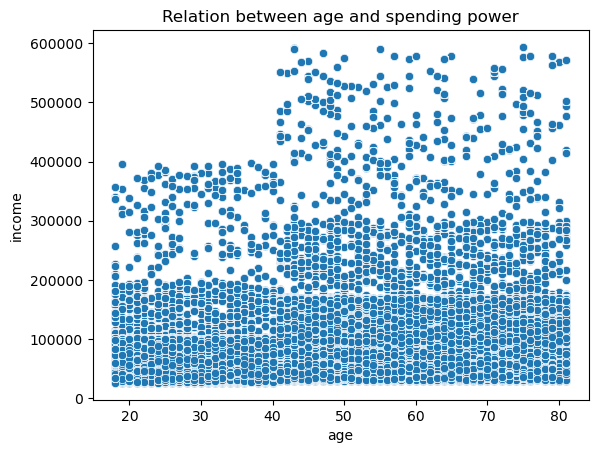

In [45]:
# Create a scatterplot
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = instacart_4)
scatterplot.set_title('Relation between age and spending power')

In [46]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'Relation between age and spending power.png'))

#### Among younger age groups, especially between 20 and 40, there's a broad range of incomes, mostly clustered at the lower end. As individuals reach about 40 and beyond, there's a noticeable rise in income, with many falling into higher income brackets. This suggests that income tends to grow as people age. For those over 40, the concentration of data points on the income scale is notably higher compared to those under 40, indicating a likely increase in median income with age. While the scatterplot offers a visual cue about potential income growth with age, confirming correlations or understanding the intricacies would require statistical analysis.

# 04. Export the visualizations as 'png' files in the relevant project folder

In [24]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'hist_order_hour_of_day_frequency.png'))

In [25]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'loyalty_flag_distribution.png'))

In [26]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'change_in_price_over_hours_of_the_day.png'))

In [27]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'age_vs_n_dependants.png'))

In [28]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'change_in_spending_power_over_age.png'))